In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [23]:
games_df = pd.read_csv("games.csv")
player_play_df = pd.read_csv("player_play.csv")
players_df = pd.read_csv("players.csv")
plays_df = pd.read_csv("plays.csv")

In [24]:
games_df.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23


In [25]:
games_df.columns

Index(['gameId', 'season', 'week', 'gameDate', 'gameTimeEastern',
       'homeTeamAbbr', 'visitorTeamAbbr', 'homeFinalScore',
       'visitorFinalScore'],
      dtype='object')

In [26]:
player_play_df.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,...,NaN,NaN,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
player_play_df.columns

Index(['gameId', 'playId', 'nflId', 'teamAbbr', 'hadRushAttempt',
       'rushingYards', 'hadDropback', 'passingYards', 'sackYardsAsOffense',
       'hadPassReception', 'receivingYards', 'wasTargettedReceiver',
       'yardageGainedAfterTheCatch', 'fumbles', 'fumbleLost',
       'fumbleOutOfBounds', 'assistedTackle', 'forcedFumbleAsDefense',
       'halfSackYardsAsDefense', 'passDefensed', 'quarterbackHit',
       'sackYardsAsDefense', 'safetyAsDefense', 'soloTackle', 'tackleAssist',
       'tackleForALoss', 'tackleForALossYardage', 'hadInterception',
       'interceptionYards', 'fumbleRecoveries', 'fumbleRecoveryYards',
       'penaltyYards', 'penaltyNames', 'wasInitialPassRusher',
       'causedPressure', 'timeToPressureAsPassRusher',
       'getOffTimeAsPassRusher', 'inMotionAtBallSnap', 'shiftSinceLineset',
       'motionSinceLineset', 'wasRunningRoute', 'routeRan',
       'blockedPlayerNFLId1', 'blockedPlayerNFLId2', 'blockedPlayerNFLId3',
       'pressureAllowedAsBlocker', 'timeT

In [28]:
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [29]:
players_df.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName'],
      dtype='object')

In [30]:
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


In [80]:
plays_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [95]:
pass_run_plays_df = plays_df[['gameId', 'playId', "passLength", "rushLocationType"]]
pass_run_plays_df.head()

,gameId,playId,passLength,rushLocationType
0,2022102302,2655,6.0,NaN
1,2022091809,3698,4.0,NaN
2,2022103004,3146,-4.0,NaN
3,2022110610,348,-6.0,NaN
4,2022102700,2799,NaN,INSIDE_LEFT


In [96]:
def pass_categorize(l):
    l = float(l)
    if l <= 5:
        return 'SHORT'
    elif l > 5 and l < 20:
        return 'MEDIUM'
    elif l >= 20:
        return 'LONG'
    else:
        return l

In [97]:
pass_run_plays_df['passLength'] = pass_run_plays_df['passLength'].apply(pass_categorize)
pass_run_plays_df.head()

,gameId,playId,passLength,rushLocationType
0,2022102302,2655,MEDIUM,NaN
1,2022091809,3698,SHORT,NaN
2,2022103004,3146,SHORT,NaN
3,2022110610,348,SHORT,NaN
4,2022102700,2799,NaN,INSIDE_LEFT


In [98]:
pass_run_plays_df["playType"] = pass_run_plays_df['passLength'].combine_first(pass_run_plays_df['rushLocationType'])
pass_run_plays_df.dropna(subset=['playType'])
pass_run_plays_df = pass_run_plays_df[["gameId", "playId", "playType"]]
pass_run_plays_df.head()

,gameId,playId,playType
0,2022102302,2655,MEDIUM
1,2022091809,3698,SHORT
2,2022103004,3146,SHORT
3,2022110610,348,SHORT
4,2022102700,2799,INSIDE_LEFT


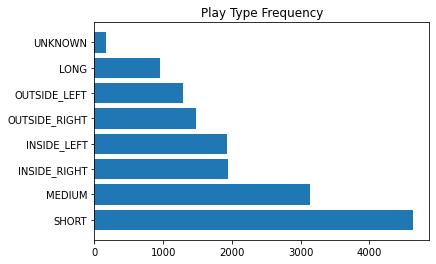

In [89]:
pt_x_ind = ['SHORT', 'MEDIUM', 'INSIDE_RIGHT', 'INSIDE_LEFT',
            'OUTSIDE_RIGHT', 'OUTSIDE_LEFT', 'LONG', 'UNKNOWN']

plt.barh(pt_x_ind, pass_run_plays_df["playType"].value_counts())
plt.title("Play Type Frequency")
plt.show()

In [61]:
player_play_motion_df = player_play_df[["gameId", "playId", "motionSinceLineset"]]
player_play_motion_df.head()

,gameId,playId,motionSinceLineset
0,2022090800,56,False
1,2022090800,56,False
2,2022090800,56,True
3,2022090800,56,False
4,2022090800,56,False


In [64]:
player_play_motion_df = player_play_motion_df.groupby(["gameId", "playId"])["motionSinceLineset"].any().reset_index()
player_play_motion_df.head()

,gameId,playId,motionSinceLineset
0,2022090800,56,True
1,2022090800,80,True
2,2022090800,101,True
3,2022090800,122,False
4,2022090800,167,False


In [45]:
len(plays_df)

16124

In [99]:
pass_run_plays_df

,gameId,playId,playType
0,2022102302,2655,MEDIUM
1,2022091809,3698,SHORT
2,2022103004,3146,SHORT
3,2022110610,348,SHORT
4,2022102700,2799,INSIDE_LEFT
...,...,...,...
16119,2022110604,1051,MEDIUM
16120,2022103005,3492,LONG
16121,2022092502,2337,INSIDE_RIGHT
16122,2022091809,719,LONG


In [101]:
motion_analysis_1_df = pd.merge(pass_run_plays_df,
                               player_play_motion_df,
                               on = ["gameId", "playId"],
                               how = 'inner')

motion_analysis_1_df

,gameId,playId,playType,motionSinceLineset
0,2022102302,2655,MEDIUM,False
1,2022091809,3698,SHORT,False
2,2022103004,3146,SHORT,False
3,2022110610,348,SHORT,False
4,2022102700,2799,INSIDE_LEFT,False
...,...,...,...,...
16119,2022110604,1051,MEDIUM,False
16120,2022103005,3492,LONG,False
16121,2022092502,2337,INSIDE_RIGHT,False
16122,2022091809,719,LONG,False


In [116]:
motion_play_results = motion_analysis_1_df[motion_analysis_1_df['motionSinceLineset'] == True]["playType"]
motion_play_results.value_counts()/len(motion_play_results)

SHORT            0.406440
MEDIUM           0.244228
INSIDE_LEFT      0.075334
INSIDE_RIGHT     0.068449
LONG             0.066626
OUTSIDE_RIGHT    0.063386
OUTSIDE_LEFT     0.059336
UNKNOWN          0.000405
Name: playType, dtype: float64

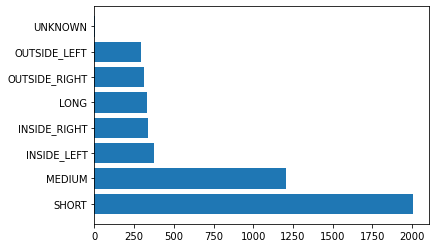

In [107]:
motion_x_ind  = ["SHORT", "MEDIUM", "INSIDE_LEFT", "INSIDE_RIGHT",
                 "LONG", "OUTSIDE_RIGHT", "OUTSIDE_LEFT", "UNKNOWN"]

plt.barh(motion_x_ind, motion_play_results.value_counts())
plt.show()

In [115]:
no_motion_play_results = motion_analysis_1_df[motion_analysis_1_df['motionSinceLineset'] == False]["playType"]
no_motion_play_results.value_counts()/len(no_motion_play_results)

SHORT            0.235205
MEDIUM           0.171911
INSIDE_RIGHT     0.143304
INSIDE_LEFT      0.139102
OUTSIDE_RIGHT    0.103433
OUTSIDE_LEFT     0.088503
LONG             0.056320
UNKNOWN          0.014572
Name: playType, dtype: float64

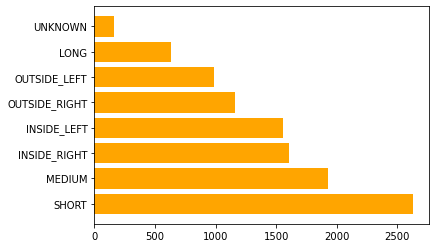

In [114]:
no_motion_x_ind  = ["SHORT", "MEDIUM", "INSIDE_RIGHT", "INSIDE_LEFT",
                    "OUTSIDE_RIGHT", "OUTSIDE_LEFT", "LONG", "UNKNOWN"]

plt.barh(no_motion_x_ind, no_motion_play_results.value_counts(), color='orange')
plt.show()